<a href="https://colab.research.google.com/github/CMM2212/Coursera_Capstone/blob/master/Traffic%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('Data-Collisions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [143]:
# DROP : INITKEY, EXCEPTRSNCODE, EXCEPTRSNDESC, EXCEPTRSNDESC, SDOTCOLNUM

df.drop(['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'EXCEPTRSNDESC', 'SDOTCOLNUM'], axis = 1, inplace=True)

print('Dropped columns with lots of missing data')

Dropped columns with lots of missing data


In [144]:
df.drop(['LOCATION', 'ST_COLDESC','CROSSWALKKEY','SEGLANEKEY','PEDROWNOTGRNT'], axis = 1, inplace=True)

print('Dropped unhelpful columns')

Dropped unhelpful columns


In [145]:
df.drop(['STATUS', 'REPORTNO', 'COLDETKEY', 'INCKEY', 'OBJECTID'], axis = 1, inplace=True)

print('Dropped unique identifying columns')

Dropped unique identifying columns


In [146]:
df.drop(['SEVERITYDESC', 'JUNCTIONTYPE','PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', 'SEVERITYCODE.1', 'HITPARKEDCAR','SDOT_COLDESC','SDOT_COLCODE' ], axis = 1, inplace=True)

print('Dropped redundant columns')

Dropped redundant columns


In [147]:
df.dropna(subset = ['X','Y','ADDRTYPE', 'COLLISIONTYPE', 'ST_COLCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], inplace=True)

print('Dropped rows with missing data in useful columns')

Dropped rows with missing data in useful columns


In [148]:
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace(np.nan,0, inplace = True)
df['UNDERINFL'].replace('N',0, inplace = True)
df['UNDERINFL'].replace('Y',1, inplace = True)
df['UNDERINFL'].replace('1',1, inplace = True)
df['UNDERINFL'].replace('0',1, inplace = True)
df['HOUR'] = df['INCDTTM'].astype('datetime64').dt.hour


In [149]:
bdf = pd.DataFrame()

#y
bdf['Severe'] = (df['SEVERITYCODE'] - 1).astype(int)

# X
bdf['Intersection'] = (df['ADDRTYPE'] == 'Intersection').astype(int)
bdf['Inattention'] = df['INATTENTIONIND']
bdf['UnderInfluence'] = df['UNDERINFL']
bdf['BadRoads'] = (df['ROADCOND'] != 'Dry').astype(int)
bdf['Speeding'] = df['SPEEDING']
bdf['Parked'] = (df['COLLISIONTYPE'] == 'Parked Car').astype(int)
bdf['RearEnded'] = (df['COLLISIONTYPE'] == 'Rear Ended').astype(int)
bdf['Pedestrian'] = (df['COLLISIONTYPE'] == 'Pedestrian').astype(int)
bdf['Cycles'] = (df['COLLISIONTYPE'] == 'Cycles').astype(int)
#bdf['HeadOn'] = (df['COLLISIONTYPE'] == 'Head on').astype(int)
bdf['LeftTurn'] = (df['COLLISIONTYPE'] == 'Left Turn').astype(int)
bdf['RightTurn'] = (df['COLLISIONTYPE'] == 'Right Turn').astype(int)
bdf['Sideswipe'] = (df['COLLISIONTYPE'] == 'Sideswipe').astype(int)
bdf['Angles'] = (df['COLLISIONTYPE'] == 'Angles').astype(int)
bdf['Weekend'] = (df['INCDTTM'].astype('datetime64').dt.weekday > 4).astype(int)
bdf['Night'] = (df['HOUR'] < 6).astype(int) + (df['HOUR'] > 20).astype(int)





In [150]:
test = bdf.iloc[:,:2]
test['Intersection'] = test['Intersection'].replace(0,np.nan)
#test.dropna(inplace=True)
##test.describe()

d = {'Severe': bdf['Severe'].mean()}
for column in bdf.columns:
  if column == 'Severe':
    continue
  temp_df = bdf[['Severe',column]]
  temp_df[column] = temp_df[column].replace(0,np.nan)
  temp_df.dropna(inplace=True)
  d[column] = temp_df['Severe'].mean()
  #d.append(temp_df['Severe'].mean() - bdf['Severe'].mean())

relation_df = pd.DataFrame(d,index=[0]).T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


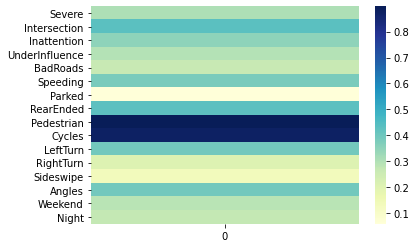

In [151]:

sns.heatmap(relation_df, cmap="YlGnBu")

In [152]:
relation_df

0
Severe          0.304107
Intersection    0.431862
Inattention     0.350483
UnderInfluence  0.295460
BadRoads        0.266566
Speeding        0.381231
Parked          0.057084
RearEnded       0.431375
Pedestrian      0.897797
Cycles          0.876258
LeftTurn        0.395135
RightTurn       0.206327
Sideswipe       0.134859
Angles          0.393815
Weekend         0.290047
Night           0.271554

In [153]:
(a >5).astype(int) + (a <3).astype(int)

0         1
1         1
2         1
3         1
4         1
         ..
124009    1
124010    1
124011    0
124012    1
124013    1
Name: INCDTTM, Length: 119325, dtype: int64

In [154]:
# Find count of missing data:

bdf.corr() 

Severe  Intersection  ...   Weekend     Night
Severe          1.000000      0.200579  ... -0.017871 -0.046083
Intersection    0.200579      1.000000  ... -0.013972 -0.055348
Inattention     0.043672     -0.080206  ... -0.020495 -0.074272
UnderInfluence -0.017771     -0.050525  ...  0.030493  0.315235
BadRoads       -0.058338     -0.041502  ...  0.014961  0.040268
Speeding        0.037347     -0.056905  ...  0.035451  0.071973
Parked         -0.310814     -0.384152  ...  0.051826  0.109516
RearEnded       0.129073     -0.213439  ... -0.027856 -0.063884
Pedestrian      0.247570      0.151269  ... -0.025821 -0.028399
Cycles          0.215473      0.084374  ... -0.030471 -0.045329
LeftTurn        0.055896      0.299047  ... -0.010065 -0.029486
RightTurn      -0.026924      0.064430  ... -0.013890 -0.015243
Sideswipe      -0.121111     -0.089798  ... -0.034130 -0.044370
Angles          0.093477      0.498380  ...  0.004162 -0.054036
Weekend        -0.017871     -0.013972  ...  1.000000  0.129665
Night          -0.046083     -0.055348  ...  0.129665  1.000000

[16 rows x 16 columns]

In [155]:
df['COLLISIONTYPE'].value_counts()

Parked Car    46213
Angles        34407
Rear Ended    32918
Other         22195
Sideswipe     18004
Left Turn     13608
Pedestrian     6536
Cycles         5366
Right Turn     2908
Head On        1991
Name: COLLISIONTYPE, dtype: int64

In [156]:
df['INCDTTM'].str.len().value_counts()

20    84425
21    49784
8     18322
19    16884
22     8178
9      6500
10       53
Name: INCDTTM, dtype: int64

In [157]:
import folium
from folium.plugins import HeatMap

lat = df['X'][:].tolist()
lng = df['Y'][:].tolist()

heatdata = [[y,x] for x,y in zip(lat,lng)]

seattle = folium.Map(location=[47.6062,-122.3321],zoom_start = 11,tiles = "Stamen Terrain")
HeatMap(heatdata, 
        blur = 6, 
        min_opacity = .1,
        max_val =1,
        radius = 4).add_to(seattle)


seattle

In [158]:
from sklearn.model_selection import train_test_split

X = bdf.iloc[:,1:]
y = bdf.iloc[:,:1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

Text(0.5, 1.0, 'Max Depth vs Score')

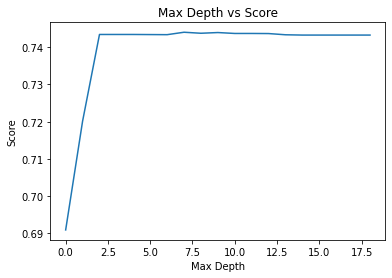

In [159]:
from sklearn.tree import DecisionTreeClassifier

scores = []
for i in range(1,20):
  tree = DecisionTreeClassifier(max_depth=i)
  tree.fit(X_train,y_train)
  score = tree.score(X_test, y_test)
  scores.append(score)

plt.plot(scores)
plt.axis
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Max Depth vs Score')

Text(0.5, 1.0, 'Min Samples Split vs Score')

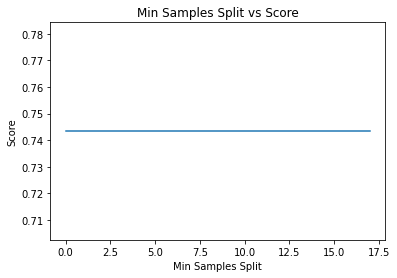

In [160]:
scores = []
for i in range(2,20):
  tree = DecisionTreeClassifier(max_depth=3, min_samples_split=i)
  tree.fit(X_train,y_train)
  score = tree.score(X_test, y_test)
  scores.append(score)

plt.plot(scores)
plt.axis
plt.xlabel('Min Samples Split')
plt.ylabel('Score')
plt.title('Min Samples Split vs Score')

In [161]:

tree = DecisionTreeClassifier(max_depth=3, criterion='entropy' )
tree.fit(X_train,y_train)
score = tree.score(X_test, y_test)
print(scores)

[0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391, 0.7434156937279391]
